# Predictive Maintenance

## Inleiding

**Auteurs:** *R. Coenen, Y. Dera, M. Vliex & S. van Wesel* <br>

## Inhoudsopgave

* [1. Business Understanding](#Chapter1)
* [2. Data mining](#Chapter2)
* [3. Data Cleaning](#Chapter3)
* [4. Data Exploration](#Chapter4)
* [5. Feature Engineering](#Chapter5)
* [6. Predictive Modeling](#Chapter6)
* [7. Data visualization](#Chapter7)

---

# 1. Business Understanding <a class="anchor" id="Chapter1"></a><br>
**Stel relevante vragen en definieer doelstellingen voor het probleem dat moet worden aangepakt.** <br>

**1.1 Over dit hoofdstuk:** <br>
In deze fase is het belangrijk om begrip te krijgen voor de probleemstelling van de klant. Het overzichtelijk in kaart brengen van de wens van de opdrachtgever kan er in resulteren dat de gegevens beter begrepen worden en dat de juisite zinvolle inzichten uit de gegevens afgeleid zullen worden. In deze fase wordt de doelstelling van het project gedefinieerd en wordt omschreven welke voorspellingen uitgewerkt moeten worden. 

**1.2 De situatie** <br>
De opdrachtgever van dit project heeft aan de projectgroep de opdracht verstrekt om een dataset te zoeken die gebruikt kan worden om voorspellingen te doen inzake het onderhoud van machines, deze methodiek heet predictive maintenance.. Het idee achter predictive maintenance is dat door het monitoren van apparatuur/machines met sensoren de life (of fail) cycle gemanaged kan worden en zo uitval van machines op tijd aangepakt
kan worden; dit is dan ook gelijk de hoofdvraag van dit project. De vertaalslag van sensor data naar een predictie over bijvoorbeeld de resterende levensduur van een apparaat is echter moeilijk en hierbij komen verschillende technieken uit de datascience en machine learning hoek aan te pas. Aan de projectgroep de taak deze vertaalslag te maken en middels verschillende methodieken uit te werken.

Predictive maintenance is een techniek welke gebruik maakt van data analyse tools en technieken om afwijkingen in een organisatie en mogelijke gebreken in apparatuur en processen vroegtijdig te detecteren zodat deze afgehandeld kunnen worden nog vóór dat deze resulteren in een fout {1}. Enerzijds focust predictive maintenance zich op het voorkomen van reactive maintenance {2}, waarbij het anderzijds de kosten voor preventive maintenance {3} probeert te verlagen.

Ter verduidelijking, er zijn een drietal vormen van predictive maintenance:

<b>Reactive (reactief)</b> - Onderhoud uitvoeren zodra er een probleem is<br>
Probleem: onverwachte storingen kunnen duur (kosten) en potentieel gevaarlijk zijn

<b>Scheuduled (gepland)</b> - Onderhoud uitvoeren op basis van een (regelmatig) schema<br>
Probleem: onnodig onderhoud kan verspilling zijn; mogelijk worden niet alle storingen verholpen

<b>Predictive (voorspellend)</b> - Voorspellen wanneer zich problemen zullen voordoen<br>
Probleem: moeilijk om nauwkeurige voorspellingen te doen voor complexe apparatuur

**1.3 Doelstelling** <br>
De casusgroep zal op basis van onderzoek een realisatie maken van een pipeline die gaat van ruwe data naar een predictie model.

**1.4 Resultaat** <br>
Een dataset en bijbehordende pipeline (i.c.m. Python scripts in Jupyter notebook vorm) voor predictive maintenance.

**1.5 Hoofdvraag** <br>
Hoe kan predictive maintenance er voor zorgen, met behulp van monitoring van apparatuur/machines/sensoren, dat de life (of fail) cycle van een machine gemanaged kan worden en zo de uitval van machines op tijd aangepakt worden.

**1.6 Deelvraag** <br>
Is het mogelijk om de data in te zetten om een predictie te krijgen van de resterende levensduur van een apparaat?

**1.7 Hypotheses** <br>
- Is het mogelijk te voorspelen welke onderdelen in de toekomst zullen falen? 
- Is het mogelijk om, middels het gebruik van labels (classificatie) meerdere klassen aan te maken met een status inzake de gezondheid van de machines/componenten. Denk bijv. aan "normaal", "onderhoud gewenst", "onderhoud kritiek" etc.

**1.8 Tools** <br>
Er zijn diverse tools die ingezet zijn bij de realisatie van dit onderzoeksrapport. Deze worden hieronder in de tabel weergeven, inclusief een (beknopte) omschrijving.<br>
De modules voor Python zijn in het hoorcollege en discussiecollege van week 4 aan bod gekomen.

| Naam              | Soort | Omschrijving | Meer informatie
| :----:            | :----:                     | :----:            | :----: |
| Python            | Programmeertaal            | Python is een open-source programeertaal welke vaak gebruikt wordt voor machine learning | [Link](#https://www.python.org/) |
| NumPy             | Module voor Python         | Module voor het omgaan met arrays en matrices met de bijbehorende functies               | [Link](#https://numpy.org/)      |
| Matplotlib        | Module voor Python         | Module voor grafische toepassingen en visualisaties                                      | [Link](#https://matplotlib.org/) |
| Seaborn           | Module voor Python         | Module voor high-level visualisaties                                                     | [Link](#https://seaborn.pydata.org/) |
| Pandas            | Module voor Python         | Module voor het opslaan en manipuleren van datastructuren                                | [Link](#https://pandas.pydata.org/) |
| Scikit-learn      | Module voor Python         | Module voor het toepassen van machine-learningtechnieken                                 | [Link](#https://www.python.org/) |
| Anaconda          | Module voor Python         | Softwaresuite die o.a. Python en diverse (bovengenoemde) libraries, inzake data science, machine learning en data processing, bevat | [Link](#https://www.anaconda.com/products/individual) |
| Jupyter Notebook  | (Web-based) Tekstverwerker | Online IDE waarmee Jupyter Notebooks (een variant op markdown bestanden) geschreven kunnen worden, in combinatie met Python programmacode | [Link](#https://jupyter.org/) 

---

# 2. Data Mining <a class="anchor" id="Chapter2"></a><br>
**Verzamel en schrap de gegevens die nodig zijn voor het project.**

**Over dit hoofdstuk:** <br>
In deze fase wordt er een dataset verkregen. Deze dataset kan afkomstig zijn van verschillende bronnen (relationele en niet-relationele databases) en/of formaten (zoals spreadsheets, CSV, tekstbestanden). <br>

Datamining is het proces van het verzamelen van de gegevens uit de verschillende bronnen. Deze fase gaat vooraf aan het groeperen en opschonen van gegevens. In deze fase wordt er na gedacht over welke gegevens relevant/nodig zijn voor het project, waar deze te vinden zijn, hoe deze verkregen kan worden en waar deze opgeslagen zal worden om mee aan de slag te gaan.

**Stap 1: Welke gegevens zijn relevant voor dit project?** <br>
In de opdrachtomschrijving van de opdrachtgever werd er gevraagd naar het voorspellen van onderhoudsmomenten voor machines, op basis van sensoren. Hierdoor zou uitval van de machines vroegtijdig aangepakt kunnen worden en eventueel de resterende levensduur in kaart gebracht worden. In dit geval is de sensordata aanwezig, onderhoudshistorie en informatie inzake failures en errors.

**Stap 2: Waar zijn deze gegevens te vinden?** <br>
De dataset waarmee gewerkt wordt in dit project is te raadplegen op [Kaggle](https://www.kaggle.com/arnabbiswas1/microsoft-azure-predictive-maintenance). Kaggle is een dochteronderneming van [Google](https://www.google.com/) en is een online platform/community, gericht op datawetenschappers en beoefenaars van machine learning. Deze website biedt gebruikers de mogelijkheid om datasets te vinden en te publiceren evenals dat gebruikers de mogelijkheid hebben om direct aan de slag te kunnen gaan met de datasets. 

De 'Microsoft Azure Predictive Maintenance' wordt voor dit project dus gedownload vanaf Kaggle. Deze dataset is echter in het verleden beschikbaar gesteld door [Microsoft](https://www.microsoft.com/) als een project onder de noemer 'Azure AI Notebooks for Predictive Maintenance'. Dit project is echter op 15 oktober 2020 beëindigd{1}. De dataset is via Kaggle wel nog te downloaden.

**Stap 3: Hoe kan deze data verkregen worden?** <br>
Via Kaggle zijn de 5, destijds door Microsoft beschikbaar gestelde, gegevens te vinden. Deze zijn opgeslagen en gepubliceerd in een CSV-formaat (kommagescheiden bestand). Deze dataset bestaat uit 5 delen: errors (1), failures (2), machines (3), maint (4) en telemtry (5). 

**Stap 4: Waar wordt de data opgeslagen (zodat er mee gewerkt kan worden)?** <br>
Er wordt een centrale [GitHub](https://www.github.com/) omgeving aangemaakt waarbinnen de datasets worden opgeslagen. Deze omgeving biedt ook de mogelijkheid om het onderzoeksrapport te uploaden en de verschillende versies van de verschillende projectleden bij te houden inclusief een versiehistorie en de mogelijkheid om alle nieuwe revisies samen te voegen tot één gezamelijk bestand.

**Stap 5: Een blik werpen op de data** <br>
De dataset bestaat uit de volgende gegevens:
- **Machinecondities en gebruik**: De bedrijfsomstandigheden (de omstandigheden wanneer de machine aan staat) van een machine, b.v. gegevens verzameld van sensoren.
- **Storingshistorie**: De storingshistorie van een machine of onderdeel binnen de machine.
- **Onderhoudshistorie**: De reparatiehistorie van een machine, b.v. foutcodes, eerdere onderhoudsactiviteiten of vervanging van onderdelen.
- **Machinekenmerken**: De kenmerken van een machine, b.v. merk en model, locatie etc.

En bevat de volgende kenmerken:
- **Telemetrie-tijdreeksgegevens (PdM_telemetry.csv)**: het bestaat uit het uurgemiddelde van spanning, rotatie, druk en trillingen verzameld van 100 machines voor het jaar 2015.
- **Fout (PdM_errors.csv)**: Dit zijn fouten die de machines tegenkomen terwijl ze in bedrijf (actief) zijn. Aangezien deze fouten de machines niet afsluiten, worden deze niet als storingen beschouwd. De foutdatum en -tijden worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens tegen een uurtarief worden verzameld.
- **Onderhoud (PdM_maint.csv)**: Als een onderdeel van een machine wordt vervangen, wordt dat als record vastgelegd in deze tabel. Onderdelen worden vervangen in twee situaties: <br>
1. Tijdens het reguliere geplande bezoek heeft de monteur het vervangen (Proactief Onderhoud) <br> 
2. Een onderdeel gaat kapot en vervolgens voert de monteur een ongepland onderhoud uit om het onderdeel te vervangen (Reactief Onderhoud). Dit wordt beschouwd als een storing en de bijbehorende gegevens worden vastgelegd onder Storingen. Onderhoudsgegevens hebben records voor zowel 2014 als 2015. Deze gegevens worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens tegen een uurtarief worden verzameld.
- **Storingen (PdM_failures.csv)**: Elk record vertegenwoordigt de vervanging van een onderdeel als gevolg van een storing. Deze gegevens zijn een subset van onderhoudsgegevens. Deze gegevens worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens tegen een uurtarief worden verzameld.
- **Metadata van machines (PdM_Machines.csv)**: modeltype en leeftijd van de machines.

*Tabel 1: Data Dictionary*

| Feature   | Omschrijving | Voorbeeld data    | Data Type | Type variabele | Meeteenheid | (Oorspronkelijke) databron |
| ----------| -------------| ----------------- | ----------| ---------------| ------------|  --------------------------|
| machineID | Iedere machine wordt gekenmerkt door een uniek identificatienummer | 1 | Int64 | Kwalitatief (discreet) | n.v.t | PdM_machines.csv |
| model     | Er zijn verschillende soorten modellen, die gekenmerkt worden door een modelnummer | model 3 | text | Kwalitatief (discreet) | n.v.t |PdM_machines.csv |
| age       | De leeftijd van de machines/compontenten | 18 | Int64 | Kwantitatief (discreet) | Maanden | PdM_machines.csv |
| datetime  | Geeft de datum en tijd weer | 3-1-2015 07:00:00 | datetime | Kwantitatief (continue) | Uren, minuten, seconde | PdM_errors.csv     |
| errorID   | Iedere error wordt gekenmerkt door een (uniek) error nummer | error1 | text | Kwalitatief (discreet) | n.v.t | PdM_errors.csv     |
| failure   | Geeft aan welk component gefaald is | comp4 | text | Kwalitatief (discreet) | Binair | PdM_failures.csv |
| comp      | Ieder component wordt gekenmerkt door een componentnummer | comp2 | text | Kwalitatief (discreet) | n.v.t | PdM_maint.csv |
| volt      | De elektrische spanning in volt | 176217853015625 | Int64 | Kwantitatief (continue)| voltage ($V$) | PdM_maint.csv |
| rotate    | Aantal rotaties per minuut | 418504078221616   | Int64 | Kwantitatief (continue) | Rotaties per minuut ($RPM$) | PdM_maint.csv  |
| pressure  | Uitgeoefende druk in Kilo pascal (=0,01 bar) | 113077935462083   | Int64 | Kwantitatief (continue) | Kilo Pascal ($kPa$) (1 kPa = 0,01 bar) | PdM_maint.csv  |
| vibration | Periodieke beweging van een voorwerp of medium | 450876857639276 | Int64 | Kwantitatief (continue) | Herz ($Hz$) | PdM_maint.csv |

In onderstaande code wordt, op een simplistische wijze, een beperkte inkijk gegeven in de data.

In [41]:
# Het importeren van de benodigde bilbiotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [42]:
# Het inlezen van de bestanden
dfTelemetry = pd.read_csv('data/PdM_telemetry.csv')
dfErrors = pd.read_csv('data/PdM_errors.csv')
dfMaint = pd.read_csv('data/PdM_maint.csv')
dfFailures = pd.read_csv('data/PdM_failures.csv')
dfMachines = pd.read_csv('data/PdM_machines.csv')

In [43]:
#Het tonen van de data (standaard toont de .head functie de eerste 5 rijen van de code) 
dfTelemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [44]:
#Het tonen van de data (standaard toont de .head functie de eerste 5 rijen van de code) 
dfErrors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [45]:
#Het tonen van de data (standaard toont de .head functie de eerste 5 rijen van de code) 
dfMaint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [46]:
#Het tonen van de data (standaard toont de .head functie de eerste 5 rijen van de code) 
dfFailures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [47]:
#Het tonen van de data (standaard toont de .head functie de eerste 5 rijen van de code) 
dfMachines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


Bovenstaande dataframes worden op een later moment samengevoegd tot één dataframe (zie hoofdstuk 3).

In [48]:
# Het vertonen van het aantal rijen en het aantal kolommen
dfTelemetry.shape

(876100, 6)

Zoals te zien zijn er maarliefst 876.100 records aanwezig in de telemetrie logfiles.

In [49]:
dfTelemetry.machineID.nunique()

100

Deze zijn verzameld over 100 machines, zoals hierboven weergegeven.

# 3. Data Cleaning <a class="anchor" id="Chapter3"></a><br>
Dit hoofdstuk gaat in op het gereed maken van de dataset. Oorspronkelijk bestaat de dataset uit 5 losse csv bestanden die tot één document samengevoegd dient te worden. Het samenvoegen van het document gebeurd in de paragraaf [Data Wrangling](#Chapter3.1). Vervolgens worden stappen ondernomen om enerzijds vast te stellen of data cleaning benodigd is na het samenvoegen van de data en anderzijds deze zaken op te lossen. Dit is terug te vinden in [paragraaf 3.2.](#Chapter3.2). Zo bestaat dit hoofdstuk uit de twee grote componenten voor het gereedmaken van de data voordat deze verkend kan worden; 
+ *Data Wrangling*: Het samenvoegen van brondata tot één dataframe.
+ *Data Cleaning*: Het identificeren van fouten in de data en deze afhandelen.

## 3.1. Data Wrangling <a class="anchor" id="Chapter3.1"></a><br>
Data wrangling betreft het op elkaar laten passen van de data. Hiermee wordt bedoelt het leggen van [relaties](https://www.techopedia.com/definition/21677/relation#:~:text=In%20relational%20databases%2C%20a%20relationship,key%20of%20the%20other%20table.&text=Relation%2C%20therefore%2C%20is%20the%20defining,also%20be%20known%20as%20relationship.) tussen de tabellen. Het samenvoegen van de bronnen volgt een aantal stappen. Deze worden onderverdeeld in stapnummers en parallel gedocumenteerd en uitgevoerd.  

### 3.1.1. Data Wrangling stap 1 <a class="anchor" id="Chapter3.1.1"></a><br>
De eerste stap voor het op elkaar laten passen is het inzichtelijk maken van het datamodel. Middels gebruik te maken van [Microsoft PowerBI](https://powerbi.microsoft.com/nl-nl/) wordt een model opgesteld waarbij de relaties tussen de tabellen geïdentificeerd kunnen worden. Dit heeft als resultaat het onderstaat Entity Attribute Relation Diagram (EARD):

<img src="img/Oorspronkelijk_dataModel.png" alt="oorspronkelijk datamodel" width="650"/><br>
*Oorspronkelijk datamodel* <br>

Onderstaande tabel omschrijft de relaties tussen de tabellen met een verdere diepgaande omschrijving om extra verheldering te bieden. 

*Relaties in model*
|Tabel 1 (van)|Tabel 2 (naar)|Type relatie|Omschrijving|
|:---:|:---:|---|---|
|PDM_Machines|PDM_Maint|1 op 0 of meer (1...0*)|De relatie tussen de tabellen definieerd dat één machine 0 of meer keer onderhoud zal ondergaan|
|PDM_Machines|PDM_Failures|1 op 0 of meer (1...0*)|De relatie tussen de tabellen definieerd dat één machine 0 of meer failures kan hebben|
|PDM_Machines|PDM_Errors|1 op 0 of meer (1...0*)|De relatie tussen de tabellen definieerd dat één machine 0 of meer errors kan hebben|
|PDM_Machines|PDM_Telemetry|1 op 1 of meer (1...1*)|De relatie tussen de tabellen definieerd dat één machine minstens één keer gemeten is in de operationele staat|

Echter, op basis van diepgaander onderzoek blijkt dat de tabellen anders samengevoegd dienen te worden. Dit komt door een verschillende aantal opvallende zaken waarmee rekening gehouden dient te worden bij het samenvoegen van de bronbestanden. Deze opvallende zaken zijn: 

+ Een Error hoeft niet altijd tot een failure te leiden en dient gezien te worden als een aparte tabel. 
+ De tabellen PDM_Maint en PDM_Failures zijn aan elkaar gelinkt. Een failure leidt namenlijk altijd tot onderhoud. Maar onderhoud wordt niet alleen uitgevoerd door de gevolgen van een failure.

Deze twee zaken dienen in acht genomen te worden bij de volgende stappen, dit zal uiteindelijk ook leiden tot een ander model. 

### 3.1.2. Data Wrangling stap 2 <a class="anchor" id="Chapter3.1.2"></a><br>
Nu bekend is hoe data onderling is gerelateerd aan elkaar, is het van belang op basis van de opvallende zaken het gehele dataframe op te gaan bouwen. Hiervan is de eerste stap direct het afhandelen van de tweede opvallende zaak (relatie tussen failures en maintenance tabel). 

**1.**<br>
De eerste samenvoeging wordt gedaan en krijgt de naam df1. df1 is een left join van de maintenance tabel op de failures tabel. Hierbij worden vanuit de PDM_Maint de kolommen ```datetime```, ```machineID``` en ```comp``` meegenomen. Vanuit de rechter tabel (PDM_failure) worden de kolommen ```datetime```, ```machineID``` en ```failure``` meegenomen. Hierbij is het mogelijk dat comp en failure op elkaar gejoined worden aangezien de inhoud van de rijen hetzelfde is. Een voorbeeld van de inhoud van de [comp] is namenlijk "comp4", deze waarde kan ook terug komen in de kolom failure van PDM_failures. Onderstaande regel toont de code hiervoor. 

```df1 = pd.merge(dfMaint, dfFailures, how='left', left_on=['datetime', 'machineID', 'comp'], right_on = ['datetime', 'machineID', 'failure'])```

**2.**<br>
Nadat de tabellen zijn samengevoegd is het van belang de lege waardes (Nan) in de 'failure' kolom op te vullen met een 0. Dit wordt gedaan om aan te duiden dat wanneer er een 0 staat, er geen failure op heeft getreden. Dit wordt uitgevoerd met de regel: 

```df1['failure'] = df1['failure'].fillna(0)```

**3.**<br>
Vervolgens is het van belang dat wanneer er een failure op heeft getreden (de rijen in de kolom [failure] die een waarde hebben), deze waarde op 1 gezet wordt. Hiermee wordt de kolom [failure] omgezet naar een binaire waarde. Wanneer dit is uitgevoerd indiceert een '1' in de kolom [failure] een failure, en een '0' geen failure. Het corresponderende component wanneer een failure optradt, is te zien in de kolom [comp]. Om dit te verwezenlijken wordt de volgende regel code uitgevoerd: 

```df1.loc[((df1.failure == 'comp1') | (df1.failure == 'comp2') | (df1.failure == 'comp3') | (df1.failure == 'comp4')), 'failure'] = '1'```

**4.**<br>
Vervolgens wordt in een laatste sub-stap een regel code uitgevoerd om de datatype kolom [failure] om te zetten naar een integer datatype. Dit wordt gedaan om er later berekeningen over te kunnen doen. 

```df1['failure'] = df1['failure'].astype(int)```

Alle stappen worden in onderstaande codeblock uitgevoerd. 

In [50]:
# #Left join failures on maintenance to create df1
df1 = pd.merge(dfMaint, dfFailures, how='left', left_on=['datetime', 'machineID', 'comp'], right_on = ['datetime', 'machineID', 'failure'])
df1['failure'] = df1['failure'].fillna(0) #indicates maint was not a failure
df1.loc[((df1.failure == 'comp1') | (df1.failure == 'comp2') | (df1.failure == 'comp3') | (df1.failure == 'comp4')), 'failure'] = '1' #indicates maintenance was a failure
df1['failure'] = df1['failure'].astype(int)

### 3.1.3. Data Wrangling stap 3 <a class="anchor" id="Chapter3.1.3"></a><br>
De volgende stap in het samenvoegen van de dataset betreft het gereed maken van de Error tabel. De Error tabel voegt per error een nieuwe rij toe wat resulteert in redundante data. Een voorbeeld hiervan is bijvoorbeeld:

|datetime|machineID|errorID|
|---|---|---|
|7/18/2020 : 06:00:00|1|error1|
|7/18/2020 : 06:00:00|1|error2|

De twee rijen in de tabel worden redundant gezien op basis van de datetime en machineID. Het kan dus voorkomen dat een machine op één tijdstip meerdere errors krijgt. Om dit af te handelen worden een aantal stappen uitgevoerd. 

**1.** <br>
De eerste stap van het gereed maken van de errors tabel is het toekennen van het oorspronkelijke dataframe aan df2. Hierna worden vijf nieuwe kolommen aangemaakt met de namen *Error1*, *Error2*, *Error3*, *Error4* en *Error5*. De waardes voor deze kolommen worden vervolgens allemaal op *0* gezet. Onderstaande code zorgt ervoor dat dit gerealiseerd wordt: 

```python
df2 = dfErrors
df2['Error1'] = 0
df2['Error2'] = 0
df2['Error3'] = 0
df2['Error4'] = 0
df2['Error5'] = 0
```
**2.** <br>
De volgende stap in het gereedmaken van de error tabel (vanaf nu df2 genoemd) is het lokaliseren van de errorwaardes in de *errorID* kolom. Vervolgens wordt aan de bijpassende kolom waarde *1* toegevoegd. Op deze manier ontstaat een binaire waarde in een kolom. Dit betekent dat de rijen uit het eerdere voorbeeld er als volgt uit komen te zien: 

|datetime|machineID|errorID|Error1|Error2|Error3|Error4|Error5
|---|---|---|---|---|---|---|---|
|7/18/2020 : 06:00:00|1|error1|1|0|0|0|0|
|7/18/2020 : 06:00:00|1|error2|0|1|0|0|0|

Om dit te verwezenlijken wordt het onderstaande stuk code uitgevoerd: 

```python
df2.loc[(df2['errorID'] == 'error1'), 'Error1'] = 1
df2.loc[(df2['errorID'] == 'error2'), 'Error2'] = 1
df2.loc[(df2['errorID'] == 'error3'), 'Error3'] = 1
df2.loc[(df2['errorID'] == 'error4'), 'Error4'] = 1
df2.loc[(df2['errorID'] == 'error5'), 'Error5'] = 1
```

**3.** <br>
De derde stap is het groeperen van de rijen waarin de rijen alsnog dubbel staan. In de voorbeeldtabel is te zien dat de rijen nog steeds dubbel staan. Dit wordt middels een groupby afgehandeld op basis van de *datetime* en *machineID* kolom. Dit zal gebeuren voor iedere Error{n} kolom met een lengte van 5. Hiervoor zal de som opgeteld worden. Dit wordt verwezenlijkt middels onderstaande regel code. 

```python
df2 = df2.groupby(['datetime', 'machineID'])[[f'Error{n}' for n in range (1,6)]].sum() 
```

Alle stappen worden in onderstaand codeblock uitgevoerd. 

In [51]:
#Clean error table to create df2, df2 = cleansed dfErrors tbl. 
df2 = dfErrors
df2['Error1'] = 0
df2['Error2'] = 0
df2['Error3'] = 0
df2['Error4'] = 0
df2['Error5'] = 0

df2.loc[(df2['errorID'] == 'error1'), 'Error1'] = 1
df2.loc[(df2['errorID'] == 'error2'), 'Error2'] = 1
df2.loc[(df2['errorID'] == 'error3'), 'Error3'] = 1
df2.loc[(df2['errorID'] == 'error4'), 'Error4'] = 1
df2.loc[(df2['errorID'] == 'error5'), 'Error5'] = 1

# # df2 = df2.groupby(['machineID', 'datetime']).sum() #Groups on all cols.
df2 = df2.groupby(['datetime', 'machineID'])[[f'Error{n}' for n in range (1,6)]].sum() #Groups errorID cols only

### 3.1.4. Data Wrangling stap 4 <a class="anchor" id="Chapter3.1.4"></a><br>
De vierde stap betreft het samenvoegen van de *telemtry* tabel in *df2* (zojuist gereed gemaakte error tabel) Ook hier worden een aantal onderliggende stappen uitgevoerd om te komen tot *df3*. 

**1.** <br>
De eerste stap betreft het mergen van dfTelemetry met df2 om te komen tot df3. Dit wordt gedaan door een left join van dfTelemetry op df2 te doen. Hierbij worden op de kolommen *machineID* en *datetime* gekoppeld die in beiden voorkomen. Deze join zorgt ervoor dat alle rijen uit de dfTelemetry meegenomen worden en hieraan de df2 rijen en kolommen aan toe worden gevoegd. 

```python
df3 = pd.merge(dfTelemetry, df2, how='left', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])
```

Dit leidt tot de volgende handelingen die gedaan dient te worden. Wanneer nu df3 wordt bekeken ontstaat er namelijk het volgende waarbij alle reeds aangemaakte kolommen (Error1 t/m 5) weer op NaN zijn gezet: 

|datetime|machineID|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|176.217853|418.504078|113.077935|45.087686|NaN|NaN|NaN|NaN|NaN|
|2015-01-01 07:00:00|1|162.879223|402.747490|95.460525|43.413973|NaN|NaN|NaN|NaN|NaN|

**2.** <br>
Het afhandelen van de NaN waardes gebeurd in 5 regels code waarbij iedere Error{x} wordt gevuld met een *0*. Dit gebeurd middels onderstaande code:

```python
df3['Error1'] = df3['Error1'].fillna(0)
df3['Error2'] = df3['Error2'].fillna(0)
df3['Error3'] = df3['Error3'].fillna(0)
df3['Error4'] = df3['Error4'].fillna(0)
df3['Error5'] = df3['Error5'].fillna(0)
```

**3.** <br>
De laatste handeling die betreffende df3 gedaan dient te worden is het omzetten van het datatype naar een integer. Momenteel is het een object (string) door het samenvoegen van de dataframes. Middels onderstaande code worden de datatypes (dtypes) voor alle Error{x} kolommen omgezet naar een integer(32)

```python
df3.Error1 = df3.Error1.astype(int)
df3.Error2 = df3.Error2.astype(int)
df3.Error3 = df3.Error3.astype(int)
df3.Error4 = df3.Error4.astype(int)
df3.Error5 = df3.Error5.astype(int)
```

Dit leidt tot een voorbeeldtabel als (waarbij de kolommen Error1, Error2, Error3, Error4 en Error5 het datatype integer(32) hebben gekregen):

|datetime|machineID|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|176.217853|418.504078|113.077935|45.087686|1|0|0|0|0|
|2015-01-01 07:00:00|1|162.879223|402.747490|95.460525|43.413973|0|1|0|0|0|

Alle code wordt in onderstaande codeblock uitgevoerd.

In [52]:
##Create df3 by joining dfTelemetry on df2
df3 = pd.merge(dfTelemetry, df2, how='left', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])

df3['Error1'] = df3['Error1'].fillna(0)
df3['Error2'] = df3['Error2'].fillna(0)
df3['Error3'] = df3['Error3'].fillna(0)
df3['Error4'] = df3['Error4'].fillna(0)
df3['Error5'] = df3['Error5'].fillna(0)

df3.Error1 = df3.Error1.astype(int)
df3.Error2 = df3.Error2.astype(int)
df3.Error3 = df3.Error3.astype(int)
df3.Error4 = df3.Error4.astype(int)
df3.Error5 = df3.Error5.astype(int)

### 3.1.5. Data Wrangling stap 5 <a class="anchor" id="Chapter3.1.5"></a><br>
De vijfde stap betreft het samenvoegen van de zojuist aangemaakte df3 op de machines tabel. Dit betreft een relatief gemakkelijke merge die wordt gedaan middels een right join van machines op df3. Hiermee worden alle rijen van de oorspronkelijke dfTelemetry bewaard en worden de kolommen model en age vanuit de tabel machines toegevoegd. Deze join wordt gedaan enkel op de sleutel *machineID* aangezien dit de enige kolom is die beiden dataframes hebben. Onderstaande code voert dit uit gevolgd met het daaronder staande vooebeeld:

```python
df4 = pd.merge(dfMachines, df3, how='right', left_on=['machineID'], right_on=['machineID'])
```


|machineID|model|age|datetime|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|1|model3|18|2015-01-01 06:00:00|176.217853|418.504078|113.077935|45.087686|1|0|0|0|0|
|1|model3|18|2015-01-01 07:00:00|162.879223|402.747490|95.460525|43.413973|0|1|0|0|0|

Alle code wordt in onderstaand codeblock uitgevoerd.

In [53]:
## Create df4 by joining machines on df3
df4 = pd.merge(dfMachines, df3, how='right', left_on=['machineID'], right_on=['machineID'])

### 3.1.6. Data Wrangling stap 6 <a class="anchor" id="Chapter3.1.6"></a><br>
De zesde stap is het aanmaken van de volledige dataset. Op dit punt zijn de drie linkse tabellen samengevoegd tot df4 en de twee rechtse tabellen tot df1. df5 wordt de samenvoeging van deze twee dataframes waarbij een right join van df1 op df4 wordt gedaan op basis van de kolommen *machineID* en *datetime*. Hiermee worden alle oorspronkelijke rijen van de oude dataset dfTelemetry bewaard (zie code). 

```python
df5 = pd.merge(df1, df4, how='right', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])
```

Echter is het mogelijk dat hier problemen ontstaan doordat er veel lege waardes in de *comp* en *failure* kolom ontstaan, dit is terug te zien in het onderstaande voorbeeld: 

|datetime|machineID|comp|failure|model|age|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|comp4|1|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2015-01-01 07:00:00|1|comp1|0|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2016-01-01 02:00:00|100|NaN|NaN|model4|5|179.438162|395.222827|102.290715|50.771941|0|0|0|0|0|
|2016-01-01 07:00:00|100|NaN|NaN|model4|5|189.617555|446.207972|98.180607|35.123072|0|0|0|0|0|

Om problemen te voorkomen wordt een alternatieve dataset opgebouwd die is gefocust op een kleinere dataframe. Dit wordt in de volgende stap afgehandeld.

Alle code wordt in onderstaand codeblock uitgevoerd. 

In [54]:
## Create df5 by joining df1 on df4
df5 = pd.merge(df1, df4, how='right', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])
df = df5

### 3.1.7. Data Wrangling stap 7 <a class="anchor" id="Chapter3.1.7"></a><br>
Om het zojuist opgedane "probleem" te verhelpen, wordt een kleinere dataframe opgebouwd op dezelfde wijze als df5 is ontwikkeld. Echter wordt er nu gebruik gemaakt van een inner join zodat er geen lege waardes in kolommen zullen voorkomen. Dit resulteert tevens in een kleinere dataset met slechts(!) 2886 rijen. Deze zogenoemende dfSmall dataframe wordt uitgevoerd middels de regel code: 

```python
dfSmall = pd.merge(df1, df4)
```

Hiermee ontstaat het volgende: 

|datetime|machineID|comp|failure|model|age|volt|rotate|pressure|vibration|Error1|Error2|Error3|Error4|Error5|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|2015-01-01 06:00:00|1|comp4|1|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2015-01-01 07:00:00|1|comp1|0|model3|18|179.303153|499.777962|111.833028|52.383097|0|0|0|0|0|
|2015-12-09 06:00:00|100|comp2|1|model4|5|144.720190|377.188361|109.995936|28.433400|0|0|0|0|0|
|2015-12-24 06:00:00|100|comp2|0|model4|5|154.408466|535.776651|102.614263|30.723456|0|0|0|0|0|

alle code wordt in onderstaand codeblock uitgevoerd.

In [55]:
#Create dfSmall by inner joining df1 on df4
dfSmall = pd.merge(df1, df4)

## 3.2. Data Cleaning <a class="anchor" id="Chapter3.2"></a><br>
**Identificatie van fouten** <br>
Data cleaning betreft het proces voor het schoonmaken van de data waarbij op een aantal zaken wordt gelet. Aan de hand van [deze website](https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/) worden verschillende stappen code uitgevoerd om inzicht te krijgen in de data en hoe schoon deze data is. Middels onderstaande regels code worden de eerste inzichten verkregen in de (lege) waardes van de data. Wanneer hier opvallende zaken optreden is het van belang deze af te handelen.

```python
df.head()
df.tail()
```

In [56]:
print(df.isna().any())
print(df.isna().sum())

datetime     False
machineID    False
comp          True
failure       True
model        False
age          False
volt         False
rotate       False
pressure     False
vibration    False
Error1       False
Error2       False
Error3       False
Error4       False
Error5       False
dtype: bool
datetime          0
machineID         0
comp         873937
failure      873937
model             0
age               0
volt              0
rotate            0
pressure          0
vibration         0
Error1            0
Error2            0
Error3            0
Error4            0
Error5            0
dtype: int64


# 4. Data Exploration <a class="anchor" id="Chapter4"></a><br>
In dit hoofdstuk worden verschillende verwachtingen vanuit het perspectief van de dataset geformuleerd. Deze verwachtingen zijn gebaseerd op de kennis over de data die in voorgaande hoofdstukken is opgedaan. De verwachtingen worden in een later stadium bevestigd middels de realisatie van machine learning modellen.

Om de verwachtingen te onderbouwen wordt gebruik gemaakt van een correlatie heatmap, visualisaties over de data en waar nodig literatuur.

## 4.1. Verwachtingen <a class="anchor" id="Hypothesen"></a><br>
In deze paragraaf worden de verwachtingen vanuit de data opgesteld. Eerder is in *paragraaf .....* de verwachting genoemd dat de operationele prestaties van de machines invloed hebben op de failures die bij de machines ontstaan. Deze verwachting wordt onderstaande uitgesplitst in meerdere sub-verwachtingen.

**Sub-verwachtingen:**<br>
1. Het voltage van de machines heeft invloed op het optreden van failures.
2. De rotatie van/in de machines heeft invloed op het optreden van failures.
3. De druk van/binnen de machines heeft invloed op het optreden van failures.
4. De vibratie van de machines heeft invloed op het optreden van failures.

Naast de hierboven genoemde sub-verwachtingen wordt ook verwacht dat: <br>
1. De leeftijd van de machines invloed heeft op het optreden van failures.

## 4.2. Correlatie heatmap
Om het verband tussen de onafhankelijke features zoals bijvoorbeeld voltage en de afhankelijke feature "failure" in kaart te brengen wordt er een correlatie heatmap gerealiseerd. In de correlatie heatmap kan worden afgelezen of er een negatieve, positieve of geen correlatie (verband) aanwezig is tussen een onafhankelijke en afhankelijke feature. Middels het identificeren van correlaties wordt bekend of de onafhankelijke feature invloed heeft op de afhankelijke feature en kunnen de eerder beschreven verwachtingen onderbouwd worden.

Voor elke verwachting, beschreven in de voorgaande paragraaf, wordt de correlatie tussen de onafhankelijke en afhankelijke feature inclusief de betekenis beschreven in onderstaande tabel. In de tabel wordt ook aangegeven hoe sterk of zwak een correlatie is. De identificatie hiervan is gebaseerd op een tabel uit de bron [Correlatie](https://www.scribbr.nl/statistiek/correlatie/).

| Verwachting | Correlatie | Betekenis Correlatie |
| :---------: | :--------: | :------------------: |
| Voltage heeft invloed op failure | 0.11 | Het betreft hier een zeer lage positieve correlatie. Wanneer het voltage van een machine toeneemt zal ook de kans op een failure toenemen. |
| Rotation heeft invloed op failure | - 0.19 | Het betreft hier een zeer lage negatieve correlatie. Wanneer de rotatie van/in een machine toeneemt zal de kans op een failure afnemen. |
| Pressure heeft invloed op failure | 0.15 | Het betreft hier een zeer lage positieve correlatie. Wanneer de druk (pressure) van/binnen een machine toeneemt zal ook de kans op een failure toenemen. |
| Vibration heeft invloed op failure | 0.20 | Het betreft hier een zeer lage positieve correlatie. Wanneer de vibratie van een machine toeneemt zal ook de kans op een failure toenemen. |
| Age heeft invloed op failure | 0.13 | Het betreft een zeer lage positieve correlatie. Wanneer de leeftijd (age) van een machine toeneemt zal ook de kans op een failure toenemen |

Op basis van de correlatie heatmap kan geconcludeerd worden dat voor iedere verwachting de onafhankelijke feature een lichte invloed heeft op de afhankelijke feature "failure".

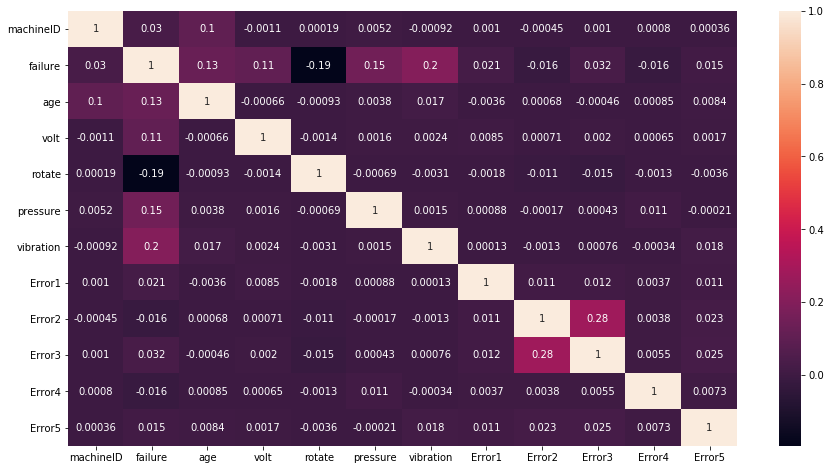

In [57]:
plt.figure(figsize=[15,8])
sb.heatmap(df.corr(),annot=True)

## 4.3. Visualisaties
Om (visueel) meer inzicht te verkrijgen in de correlaties tussen de onafhankelijke features en de afhankelijke feature "failure" wordt voor elke verwachting een visualisatie gerealiseerd.

## 4.4. Additionele zaken

# 5. Feature Engineering <a class="anchor" id="Chapter5"></a><br>

# 6. Predictive Modeling <a class="anchor" id="Chapter6"></a><br>

# 7. Data visualization <a class="anchor" id="Chapter7"></a><br>

## 7.1 Tekstuele output

## 7.2 Grafische output

# Literatuurlijst <br>

{1} https://www.fiixsoftware.com/maintenance-strategies/predictive-maintenance/ <br>
{2} https://www.fiixsoftware.com/maintenance-strategies/reactive-maintenance/ <br>
{3} https://www.fiixsoftware.com/maintenance-strategies/preventative-maintenance/ <br>